In [10]:
from spectral_cube import SpectralCube
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
import os
from reproject import reproject_interp
import matplotlib.pyplot as plt
from regions import Regions
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import sys
sys.path.append('/home/t.yoo/Paths')
import Paths.Paths as paths

Path = paths.filepaths()
image_filenames ={
    "f140m": "/orange/adamginsburg/jwst/w51/F140M/pipeline/jw06151-o001_t001_nircam_clear-f140m-merged_i2d.fits",
    "f150w": "/orange/adamginsburg/jwst/w51/F150W/pipeline/jw06151-o001_t001_nircam_clear-f150w-merged_i2d.fits",
    "f162m": "/orange/adamginsburg/jwst/w51/F162M/pipeline/jw06151-o001_t001_nircam_clear-f162m-merged_i2d.fits",
    "f182m": "/orange/adamginsburg/jwst/w51/F182M/pipeline/jw06151-o001_t001_nircam_clear-f182m-merged_i2d.fits",
    "f187n": "/orange/adamginsburg/jwst/w51/F187N/pipeline/jw06151-o001_t001_nircam_clear-f187n-merged_i2d.fits",
    "f210m": "/orange/adamginsburg/jwst/w51/F210M/pipeline/jw06151-o001_t001_nircam_clear-f210m-merged_i2d.fits",
    "f335m": "/orange/adamginsburg/jwst/w51/F335M/pipeline/jw06151-o001_t001_nircam_clear-f335m-merged_i2d.fits",
    "f360m": "/orange/adamginsburg/jwst/w51/F360M/pipeline/jw06151-o001_t001_nircam_clear-f360m-merged_i2d.fits",
    "f405n": "/orange/adamginsburg/jwst/w51/F405N/pipeline/jw06151-o001_t001_nircam_clear-f405n-merged_i2d.fits",
    "f410m": "/orange/adamginsburg/jwst/w51/F410M/pipeline/jw06151-o001_t001_nircam_clear-f410m-merged_i2d.fits", # weird, the filename is different from what is downloaded with the STScI pipeline...
    "f480m": "/orange/adamginsburg/jwst/w51/F480M/pipeline/jw06151-o001_t001_nircam_clear-f480m-merged_i2d.fits",
    "f560w": "/orange/adamginsburg/jwst/w51/F560W/pipeline/jw06151-o002_t001_miri_f560w_i2d.fits",
    "f770w": "/orange/adamginsburg/jwst/w51/F770W/pipeline/jw06151-o002_t001_miri_f770w_i2d.fits",
    "f1000w": "/orange/adamginsburg/jwst/w51/F1000W/pipeline/jw06151-o002_t001_miri_f1000w_i2d.fits",
    "f1280w": "/orange/adamginsburg/jwst/w51/F1280W/pipeline/jw06151-o002_t001_miri_f1280w_i2d.fits",
    "f1500w": "/orange/adamginsburg/jwst/w51/F1500W/pipeline/jw06151-o002_t001_miri_f1500w_i2d.fits",
    "f2100w": "/orange/adamginsburg/jwst/w51/F2100W/pipeline/jw06151-o002_t001_miri_f2100w_i2d.fits",
    
}

alma_b3_fits = fits.open(Path.w51n_b3_tt0)
alma_b3_image = alma_b3_fits[0].data
if len(alma_b3_image.shape)!=2:
    alma_b3_image = alma_b3_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_b3_wcs = WCS(alma_b3_fits[0].header, naxis=2)
print()
alma_b6_fits = fits.open(Path.w51n_b6_tt0)
alma_b6_image = alma_b6_fits[0].data
if len(alma_b6_image.shape)!=2:
    alma_b6_image = alma_b6_image[0, 0, :, :]  # Adjust if the data is 3D (e.g., spectral cube)
alma_b6_wcs = WCS(alma_b6_fits[0].header, naxis=2)









In [11]:
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import numpy as np
def make_rgb_image(repr480_image_filenames, filt1, filt2, filt3, cutout_region=None,
    alpha_red=0.7, alpha_green=0.78, alpha_blue=0.74, 
    figsize=(48,20),
    vmin_img1=-2.12, vmax_img1=3987, vmin_img2=-2.12, vmax_img2=2409, vmin_img3=-2.12, vmax_img3=798, 
    color_scheme='rgb', stretch='log'):
    """
    Create an RGB image from three filters.
    """
    img1 = fits.getdata(repr480_image_filenames[filt1])
    img2 = fits.getdata(repr480_image_filenames[filt2])
    img3 = fits.getdata(repr480_image_filenames[filt3])

    ref_fits = fits.open(repr480_image_filenames['f140m'])
    tgt_header = fits.getheader(repr480_image_filenames['f140m'])

    wcs_header = WCS(tgt_header)
    if color_scheme == 'rgb':
        cmap1 = LinearSegmentedColormap.from_list('red', [(0, 0, 0), (1, 0, 0)])
        cmap2 = LinearSegmentedColormap.from_list('green', [(0, 0, 0), (0, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('blue', [(0, 0, 0), (0, 0, 1)])
    elif color_scheme == 'cmyk':
        cmap1 = LinearSegmentedColormap.from_list('magenta', [(0, 0, 0), (1, 0, 1)])
        cmap2 = LinearSegmentedColormap.from_list('yellow', [(0, 0, 0), (1, 1, 0)])
        cmap3 = LinearSegmentedColormap.from_list('cyan', [(0, 0, 0), (0, 1, 1)])

    if cutout_region is not None:
        from regions import Regions
        from astropy.nddata import Cutout2D
      
        cutout1 = Cutout2D(img1, cutout_region.center, (cutout_region.height, cutout_region.width), wcs=wcs_header)
        cutout2 = Cutout2D(img2, cutout_region.center, (cutout_region.height, cutout_region.width), wcs=wcs_header)
        cutout3 = Cutout2D(img3, cutout_region.center, (cutout_region.height, cutout_region.width), wcs=wcs_header) 
        img1 = cutout1.data
        img2 = cutout2.data
        img3 = cutout3.data

    if stretch == 'log':
        norm1 = simple_norm(img1, stretch='log', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='log', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='log', vmin=vmin_img3, vmax=vmax_img3)
    elif stretch == 'linear':
        norm1 = simple_norm(img1, stretch='linear', vmin=vmin_img1, vmax=vmax_img1)
        norm2 = simple_norm(img2, stretch='linear', vmin=vmin_img2, vmax=vmax_img2)
        norm3 = simple_norm(img3, stretch='linear', vmin=vmin_img3, vmax=vmax_img3)

    color1_rgb = cmap1(norm1(img1))[...,:3] * alpha_red
    color2_rgb  = cmap2(norm2(img2))[...,:3]  * alpha_green
    color3_rgb    = cmap3(norm3(img3))[...,:3]    * alpha_blue

    composite = color1_rgb + color2_rgb + color3_rgb
    composite = np.clip(composite, 0, 1)

    fig = plt.figure(figsize=figsize )
    ax = fig.add_subplot(111, projection=wcs_header)

    ax.imshow(composite, origin='lower', )
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')


    ra = lon = ax.coords['ra']
    dec = lat = ax.coords['dec']
    ra.set_major_formatter('hh:mm:ss.ss')
    dec.set_major_formatter('dd:mm:ss.ss')
    ra.set_axislabel('Right Ascension')
    ra.set_ticklabel(rotation=25, pad=30)
    dec.set_axislabel('Declination')
    
    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')
    print(cutout1.data.shape)
    print(cutout2.data.shape)
    print(cutout3.data.shape)
    return fig, ax, composite, cutout1.wcs, cutout1
    

(4714, 3143)
(4714, 3143)
(4714, 3143)


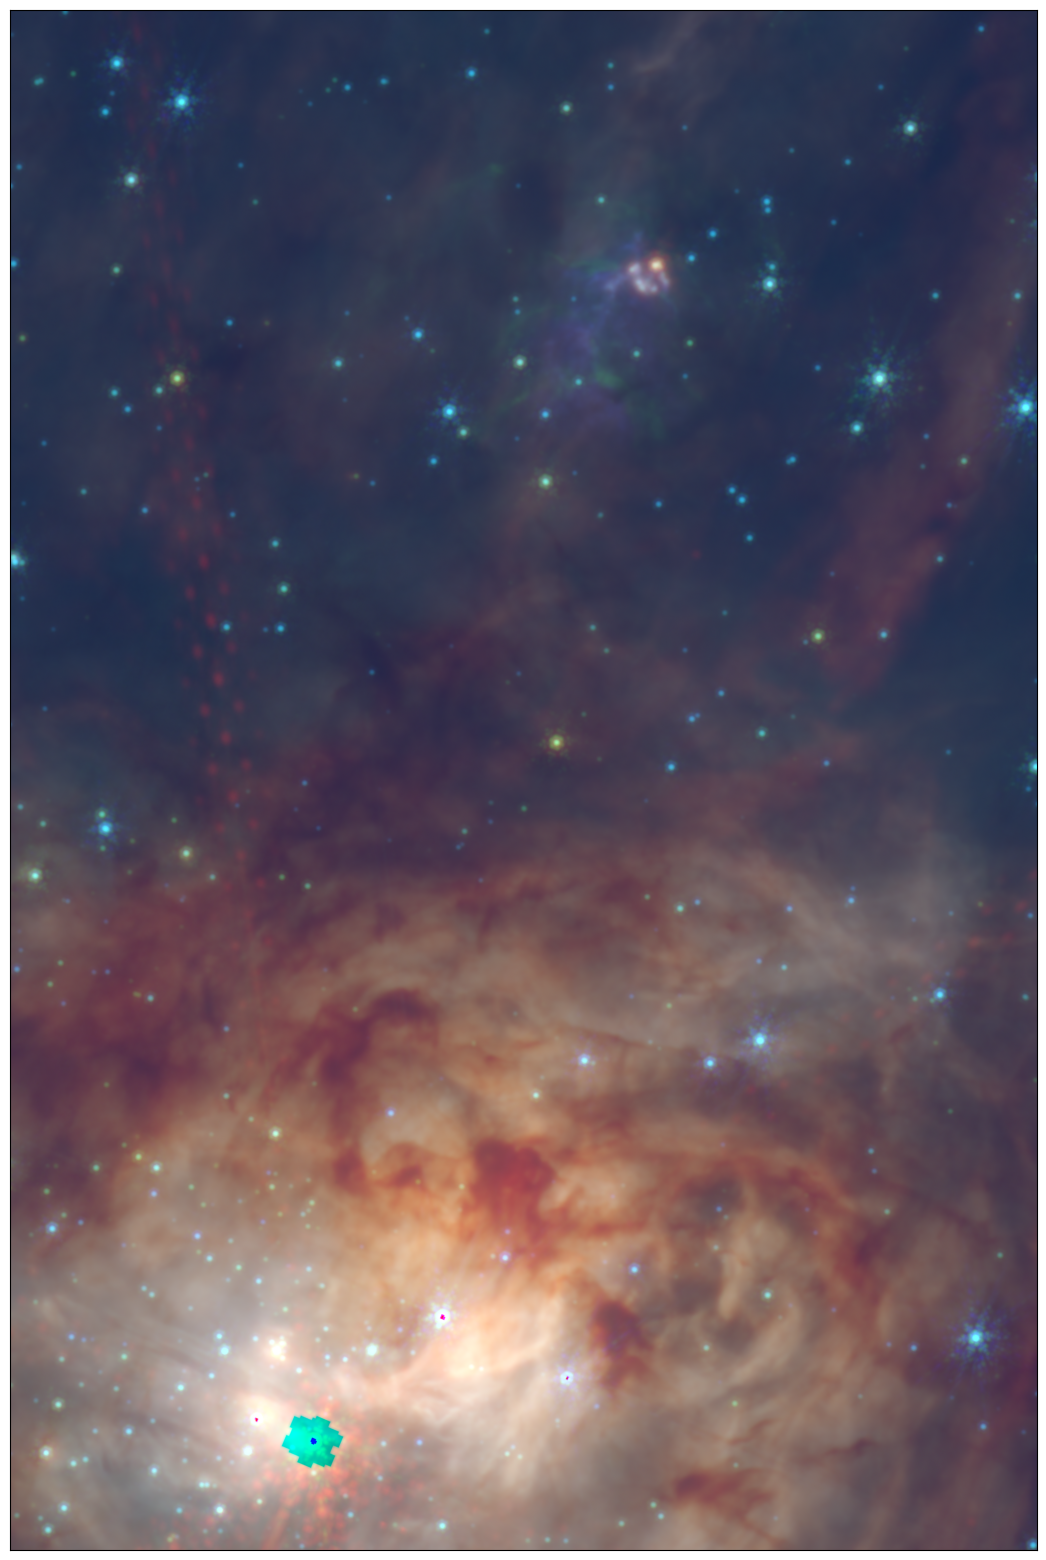

In [12]:
#overview_reg = Regions.read('regions/clean_overview.reg')[0]
#zoomin_reg = Regions.read('regions/clean_zoomin.reg')[0]
#source_reg = Regions.read('regions/clean_source.reg')[0]
overview_reg = Regions.read('regions/outflow_overview_alma_highres.reg')[0]
zoomin_reg = Regions.read('regions/outflow_zoomin_alma_highres.reg')[0]
source_reg = Regions.read('regions/outflow_source_alma_highres.reg')[0]

from astropy.table import Table
from astropy.coordinates import Angle, SkyCoord

filts = ['f140m', 'f162m', 'f210m', 'f187n', 'f405n']

repr_alma_image_filenames = {x: f'/orange/adamginsburg/jwst/w51/data_cutout_for_knot/{x}_reprojected_to_alma_b3.fits' for x in filts}


fig, ax, rgbimage_overview, overview_wcs, overview_cutout = make_rgb_image(repr_alma_image_filenames, 'f405n', 'f210m', 'f162m', alpha_red=1, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=0.04267011225633506, vmax_img1=28679, vmin_img2=-1.22, vmax_img2=1456, vmin_img3=-2.12, vmax_img3=482, cutout_region=overview_reg)
plt.savefig(f'rgbs/overview_rgb_reg_f405n-f210m-f162m.png', dpi=100, bbox_inches='tight')
plt.show()


(714, 714)
(714, 714)
(714, 714)


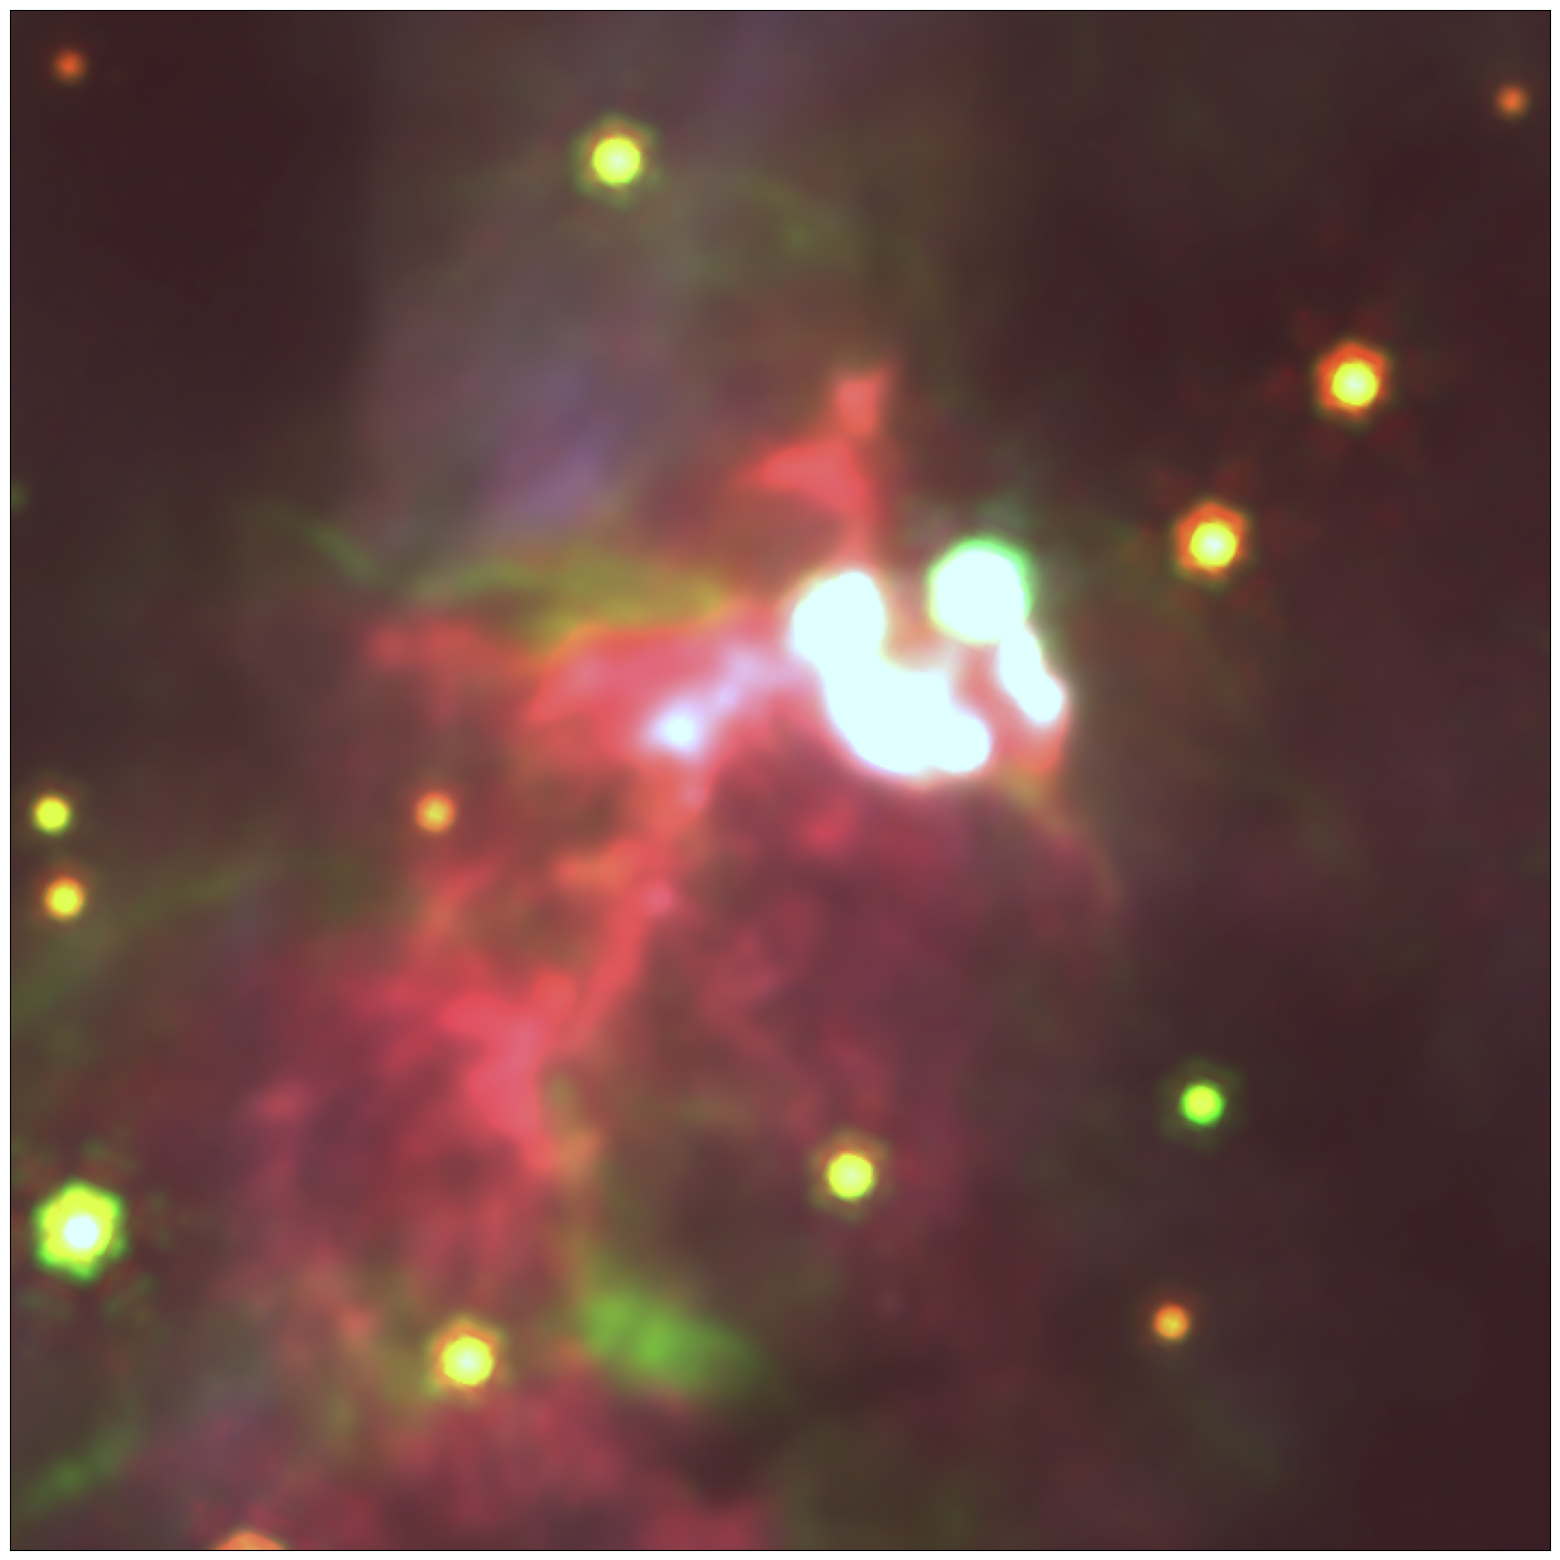

In [13]:
fig, ax, rgbimage_zoomin,_, zoomin_cutout = make_rgb_image(repr_alma_image_filenames,  'f162m', 'f210m','f187n',alpha_red=0.88, alpha_green=1, alpha_blue=1, figsize=(48,20),
vmin_img1=-1.7671406081315357, vmax_img1=10.06117385973986, vmin_img2=-1.162161170845977, vmax_img2=29.4088945802996, vmin_img3=-16.008438581575838, vmax_img3=203.61288554664003, cutout_region=zoomin_reg, stretch='linear')
plt.savefig(f'rgbs/overview_rgb_zoominreg_f162m-f210m-f187n.png', dpi=100, bbox_inches='tight')
plt.show()

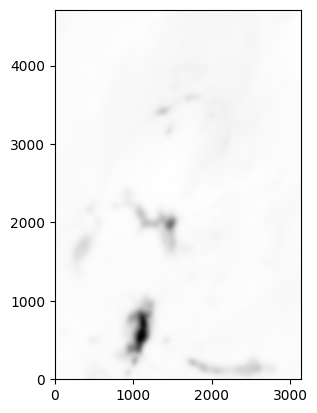

In [14]:
CO_reproj_almab3 = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/CO_moment0_reprojected_to_alma_b3.fits')
CO_reproj_almab3_wcs = WCS('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/CO_moment0_reprojected_to_alma_b3.fits', naxis=2)
overview_CO = Cutout2D(CO_reproj_almab3, overview_reg.center, (overview_reg.height, overview_reg.width), wcs=CO_reproj_almab3_wcs)
plt.imshow(overview_CO.data, origin='lower', cmap='Greys', )

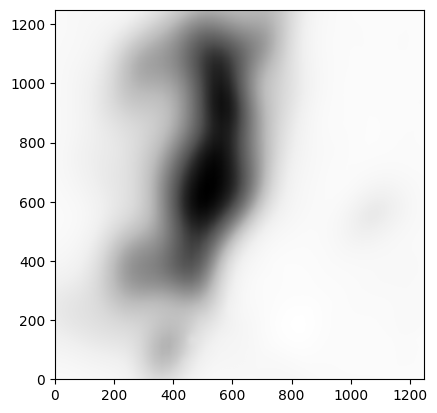

In [15]:
CO_reproj_almab6 = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/CO_moment0_reprojected_to_alma_b6.fits')
CO_reproj_almab6_wcs = WCS('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/CO_moment0_reprojected_to_alma_b6.fits', naxis=2)

HCN_reproj_almab6 = fits.getdata('/orange/adamginsburg/jwst/w51/data_cutout_for_knot/HCN_moment0_reprojected_to_alma_b6.fits')
HCN_reproj_almab6_wcs = WCS('/orange/adamginsburg/jwst/w51/data_cutout_for_knot/HCN_moment0_reprojected_to_alma_b6.fits', naxis=2)



source_CO = Cutout2D(CO_reproj_almab6, source_reg.center, (source_reg.height, source_reg.width), wcs=CO_reproj_almab6_wcs)

source_almab6 = Cutout2D(alma_b6_image, source_reg.center, (source_reg.height, source_reg.width), wcs=alma_b6_wcs)
source_HCN = Cutout2D(HCN_reproj_almab6, source_reg.center, (source_reg.height, source_reg.width), wcs=HCN_reproj_almab6_wcs)




plt.imshow(source_CO.data, origin='lower', cmap='Greys', )

In [16]:
vla_reproj_almab3 = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/vla_kuband_reprojected_to_alma_b3.fits').squeeze()
vla_reproj_almab3_wcs = WCS('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/vla_kuband_reprojected_to_alma_b3.fits', naxis=2)
print(vla_reproj_almab3.shape)
zoomin_vla = Cutout2D(vla_reproj_almab3, zoomin_reg.center, (zoomin_reg.height, zoomin_reg.width), wcs=vla_reproj_almab3_wcs)

zoomin_alma_b3 = Cutout2D(alma_b3_image, zoomin_reg.center, (zoomin_reg.height, zoomin_reg.width), wcs=alma_b3_wcs)


gtc_reproj_almab3 = fits.getdata('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/h2k_gtc_reprojected_to_alma_b3.fits') 
gtc_reproj_almab3_wcs = WCS('/orange/adamginsburg/w51/TaehwaYoo/jwst_w51/data_cutout_for_knot/h2k_gtc_reprojected_to_alma_b3.fits', naxis=2)
zoomin_gtc = Cutout2D(gtc_reproj_almab3, zoomin_reg.center, (zoomin_reg.height, zoomin_reg.width), wcs=gtc_reproj_almab3_wcs)

(14500, 14500)


 _RAJ2000   _DEJ2000 Region  p         CXOU        Label   RAJ2000    DEJ2000  ePos      PosType       no_m   no_t   no_s   no_h   KS_S   KS_M   ExpNom ExpFrac    Ct   Nobs Nph Fdis b_theta theta B_theta PSFf   Area  aglow Oct_t Oct_s Oct_h bgScl  bgct_t bgct_s bgct_h b_Nct_t Nct_t  B_Nct_t b_Nct_s Nct_s B_Nct_s b_Nct_h Nct_h B_Nct_h Area_t Area_s Area_h E_t  E_s  E_h    XFlx_t     XFlx_s     XFlx_h    EFlx_t  EFlx_s  EFlx_h
   deg        deg                                            deg        deg    arcs                                                                s               ct                   arcm   arcm   arcm                       ct    ct    ct           ct     ct     ct      ct     ct      ct      ct     ct     ct      ct     ct     ct    cm2    cm2    cm2   keV  keV  keV  ph s / cm2 ph s / cm2 ph s / cm2 mW / m2 mW / m2 mW / m2
---------- --------- ------ --- ------------------ ------ ---------- --------- ---- ----------------- ------ ------ ------ ------ ------ -----

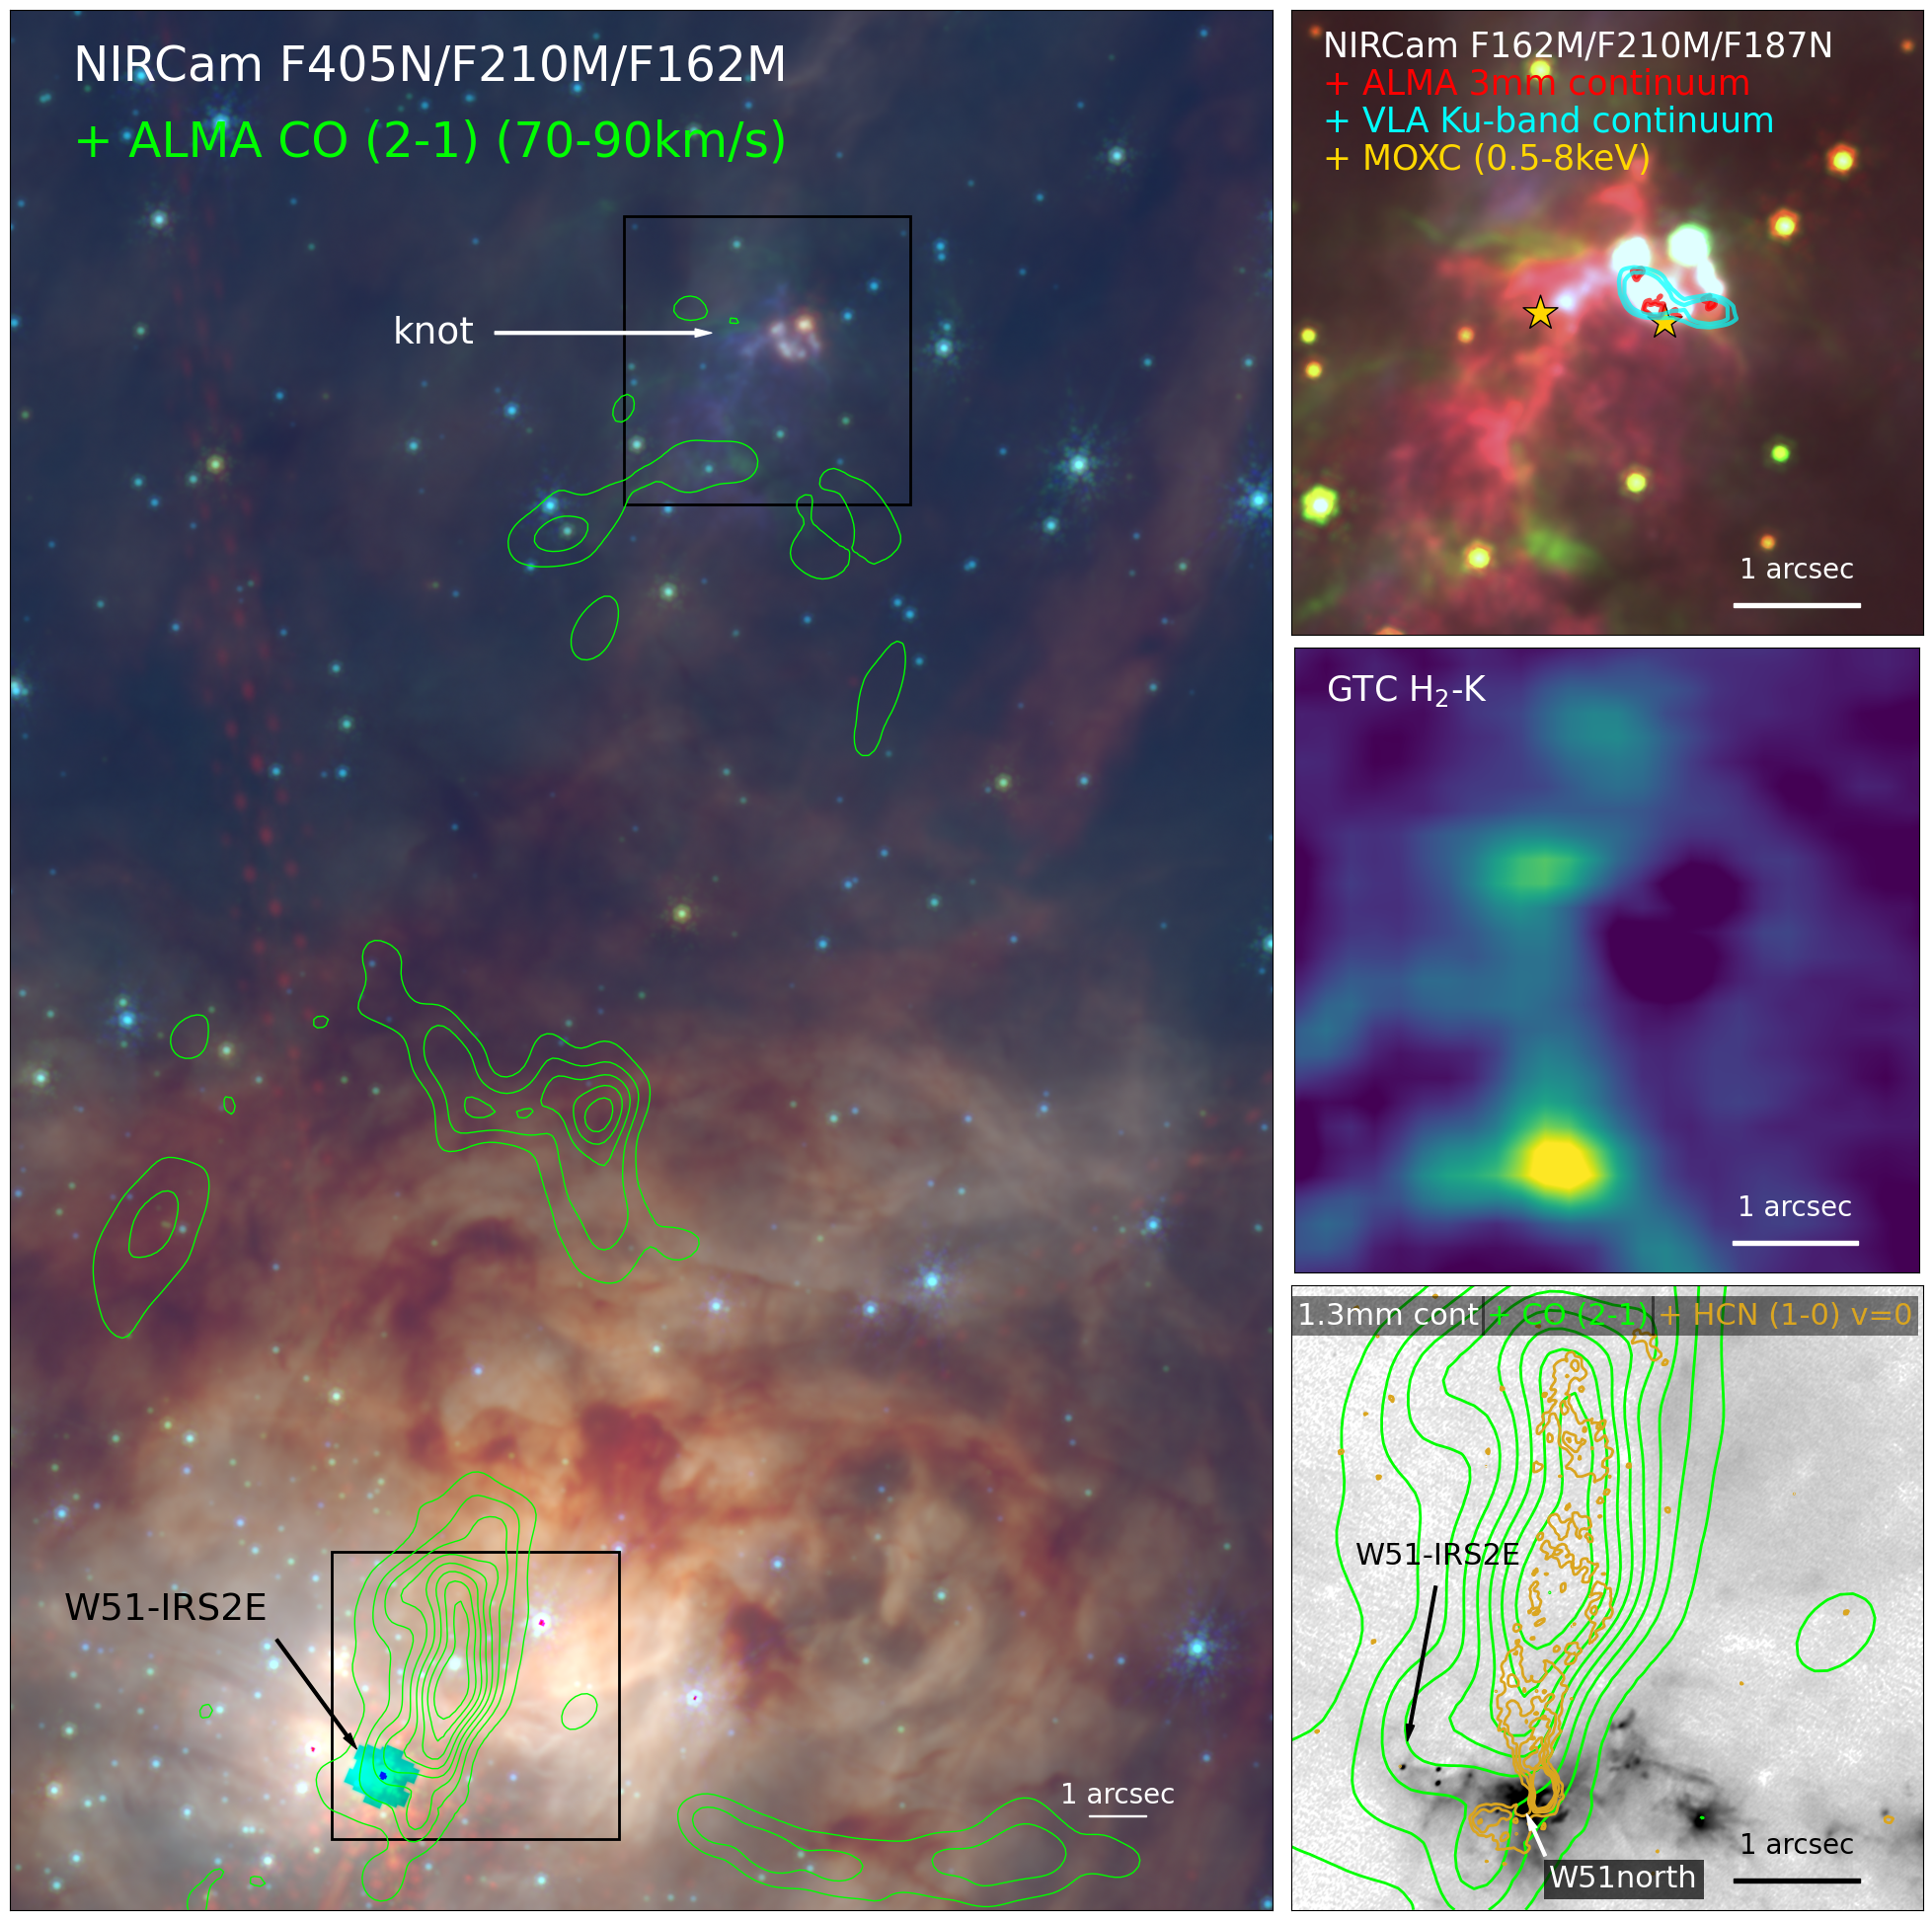

In [38]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
def add_scalebar(ax, xpos, ypos, length, pixel_scale, label=None, color='white', fontsize=20, pad=-0.2, thickness=0.03):

    scaled_length = (length / pixel_scale).to(u.deg/u.deg)
    print(scaled_length)
    ax.add_patch(Rectangle((xpos, ypos), scaled_length.value, thickness * scaled_length.value, color=color))
    if label:
        ax.text(xpos + scaled_length.value / 2, ypos + pad * scaled_length.value, label, color=color, fontsize=fontsize, ha='center')

moxc = Table.read('/orange/adamginsburg/w51/TaehwaYoo/w51_moxc.fits')
ra = moxc['RAJ2000']
dec = moxc['DEJ2000']
moxc.pprint(max_lines=-1, max_width=-1)
skycoord_moxc = SkyCoord(ra.value, dec.value, unit='deg', frame='icrs')
moxc_ind_zoomin = zoomin_reg.contains(skycoord_moxc,zoomin_alma_b3.wcs)
ra_moxc_zoomin = ra[moxc_ind_zoomin]
dec_moxc_zoomin = dec[moxc_ind_zoomin]
radec= np.vstack((ra_moxc_zoomin, dec_moxc_zoomin)).T
radec_pix = zoomin_alma_b3.wcs.wcs_world2pix(radec, 0)
ra_pix = radec_pix[:, 0]
dec_pix = radec_pix[:, 1]


fig = plt.figure(figsize=(25,25))

gs = gridspec.GridSpec(3, 2, width_ratios=[2,1], height_ratios=[1,1,1], wspace=0.02, hspace=0.02)

ax_overview = fig.add_subplot(gs[0:3,0])
ax_source = fig.add_subplot(gs[2,1])
ax_zoomin = fig.add_subplot(gs[0,1])
ax_zoomin_gtc = fig.add_subplot(gs[1,1])

ax_overview.imshow(rgbimage_overview, origin='lower', aspect='auto')

levels = np.linspace(np.nanmin(overview_CO.data), np.nanmax(overview_CO.data), 10)  
ax_overview.contour(overview_CO.data, levels=levels, colors='lime', linewidths=1, )
#ax_overview.text(0.05, 0.93, 'A', transform=ax_overview.transAxes, fontsize=40, color='white', ha='left', va='center')
ax_overview.text(0.05,0.97, 'NIRCam F405N/F210M/F162M', transform=ax_overview.transAxes, fontsize=35, color='white', ha='left', va='center')
ax_overview.text(0.05,0.93, '+ ALMA CO (2-1) (70-90km/s)', transform=ax_overview.transAxes, fontsize=35, color='lime', ha='left', va='center')
ax_overview.annotate('W51-IRS2E', xy=(0.28, 0.08), xycoords='axes fraction', fontsize=27, color='k', ha='center', va='center',
                arrowprops=dict( color='k', width=2,headwidth=6, shrink=0.07, ec='k', fc='k'), textcoords='offset pixels', xytext=(-200, 150))
ax_overview.annotate('knot', xy=(0.57, 0.83), xycoords='axes fraction', fontsize=27, color='w', ha='center', va='center',
                arrowprops=dict( color='w', width=2,headwidth=6, shrink=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(-300,0))
ax_overview.set_xticks([])
ax_overview.set_yticks([])


zoomin_reg_pix = zoomin_reg.to_pixel(overview_wcs)
zoomin_reg_pix.angle = 0*u.deg
zoomin_reg_pix.plot(ax=ax_overview, facecolor='none', edgecolor='k', lw=2)
print(rgbimage_overview.shape)
print(zoomin_reg_pix)


source_reg_pix = source_reg.to_pixel(overview_wcs)
source_reg_pix.angle = 0*u.deg
source_reg_pix.plot(ax=ax_overview, facecolor='none', edgecolor='k', lw=2)

ax_source.imshow(source_almab6.data, origin='lower', cmap='gray_r', norm=simple_norm(source_almab6.data, stretch='sqrt', min_percent=5, max_percent=99.8), aspect='auto')
ax_source.contour(source_CO.data, levels=levels, colors='lime', linewidths=2,)
levels = [2e-2, 4e-2, 6e-2, 8e-2]
ax_source.contour(source_HCN.data, levels=levels, colors='goldenrod', linewidths=2,)
ax_source.text(0.01, 0.95, '1.3mm cont', transform=ax_source.transAxes, fontsize=22, color='white', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
ax_source.text(0.31,0.95, '+ CO (2-1)', transform=ax_source.transAxes, fontsize=22, color='lime', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
ax_source.text(0.58,0.95, '+ HCN (1-0) v=0', transform=ax_source.transAxes, fontsize=22, color='goldenrod', ha='left', va='center', bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))
ax_source.annotate('W51-IRS2E', xy=(0.18, 0.25), xycoords='axes fraction', fontsize=22, color='k', ha='left', va='center',
                arrowprops=dict( color='k', width=2,headwidth=6, shrink=0.07, ec='k', fc='k'), textcoords='offset pixels', xytext=(-50,200))
ax_source.annotate('W51north', xy=(0.37, 0.16), xycoords='axes fraction', fontsize=22, color='w', ha='center', va='center',
                arrowprops=dict( color='k', width=2,headwidth=6, shrink=0.07, ec='w', fc='w'), textcoords='offset pixels', xytext=(100,-70), bbox=dict(facecolor='black', alpha=0.7, edgecolor='none'))
ax_source.set_xticks([])
ax_source.set_yticks([])



ax_zoomin.imshow(rgbimage_zoomin, origin='lower', aspect='auto')
levels = np.linspace(5.25e-5, 8.75e-5, 3)
levels = [8e-5, 1.2e-4]  # adjust number of levels as needed
ax_zoomin.contour(zoomin_alma_b3.data, levels=levels, colors='r', linewidths=3, alpha=0.7)
levels = [1e-4, 2e-4]  # adjust number of levels as needed
ax_zoomin.contour(zoomin_vla.data, levels=levels, colors='cyan', linewidths=3, alpha=0.7)
ax_zoomin.scatter(ra_pix, dec_pix, s=700, color='gold', edgecolor='k', lw=1, marker='*')

ax_zoomin.text(0.05, 0.94, 'NIRCam F162M/F210M/F187N', transform=ax_zoomin.transAxes, fontsize=25, color='white', ha='left', va='center') 
ax_zoomin.text(0.05, 0.88, '+ ALMA 3mm continuum', transform=ax_zoomin.transAxes, fontsize=25, color='red', ha='left', va='center')
ax_zoomin.text(0.05, 0.82, '+ VLA Ku-band continuum', transform=ax_zoomin.transAxes, fontsize=25, color='cyan', ha='left', va='center',)
ax_zoomin.text(0.05, 0.76, '+ MOXC (0.5-8keV)', transform=ax_zoomin.transAxes, fontsize=25, color='gold', ha='left', va='center')
ax_zoomin.set_xticks([])
ax_zoomin.set_yticks([])

norm = simple_norm(zoomin_gtc.data, stretch='linear', min_percent=5, max_percent=99.5)
ax_zoomin_gtc.imshow(zoomin_gtc.data, origin='lower', cmap='viridis', norm=norm)
ax_zoomin_gtc.text(0.05, 0.93, r'GTC ${\rm H_2}$-K', transform=ax_zoomin_gtc.transAxes, fontsize=25, color='white', ha='left', va='center')
ax_zoomin_gtc.set_xticks([])
ax_zoomin_gtc.set_yticks([])

add_scalebar(ax_overview, 0.9*rgbimage_overview.shape[1], 0.05*rgbimage_overview.shape[0], Angle(1*u.arcsec).to(u.deg), overview_cutout.wcs.pixel_scale_matrix[0][0]*u.deg, label='1 arcsec', color='white', fontsize=20)
add_scalebar(ax_source, 0.9*source_almab6.shape[1], 0.05*source_almab6.shape[0], Angle(1*u.arcsec).to(u.deg), source_almab6.wcs.pixel_scale_matrix[0][0]*u.deg, label='1 arcsec', color='k', fontsize=20)
add_scalebar(ax_zoomin, 0.9*zoomin_alma_b3.shape[1], 0.05*zoomin_alma_b3.shape[0], Angle(1*u.arcsec).to(u.deg), zoomin_alma_b3.wcs.pixel_scale_matrix[0][0]*u.deg, label='1 arcsec', color='white', fontsize=20)
add_scalebar(ax_zoomin_gtc, 0.9*zoomin_gtc.shape[1], 0.05*zoomin_gtc.shape[0], Angle(1*u.arcsec).to(u.deg), zoomin_gtc.wcs.pixel_scale_matrix[0][0]*u.deg, label='1 arcsec', color='white', fontsize=20)

plt.savefig('plots/outflow_w51.png', dpi=100, bbox_inches='tight')